In [25]:
import torch
from torch.utils.data import Dataset, DataLoader
import cv2
import numpy as np
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from DrawtexDataset import DrawtexDataset
from DrawtexModel import DrawtexModel
from skimage import morphology

In [29]:
model = DrawtexModel()
model.load_state_dict(torch.load("DrawtexModel2.pth", map_location=torch.device("cpu")))
model.eval()

ds: DrawtexDataset = DrawtexDataset(transforms.ToTensor())

dl = DataLoader(
    dataset=ds,
    batch_size=1,
    shuffle=True,
    num_workers=1
)


\succ


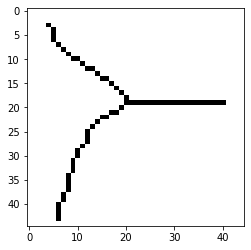

In [191]:
iter = enumerate(dl)
idx, (img, label) = next(iter)

classes = ['\\Leftarrow', '\\theta', '\\mathcal{M}', '\\mathcal{L}', '\\chi', '\\heartsuit', '\\propto',
           '\\diameter', '\\L', '\\dashv', '\\dag', 'B', '\\Vdash', '\\barwedge', '\\hbar', '\\ell', '\\o', '\\div',
           '\\prec', '\\succeq', 'D', '\\iota', '\\AA', '\\odot', '\\varpi', '+', '\\mathds{Q}', '\\varsubsetneq',
           '\\mathcal{O}', '\\lambda', '\\circlearrowright', '4', '\\sum', '\\ohm', '\\mathds{C}', '3', 'N',
           '\\Leftrightarrow', '\\lceil', '\\diamondsuit', '\\alpha', '\\Phi', '\\mathds{P}', '\\aleph', '\\mu',
           '\\geq', '\\nmid', '\\geqslant', '\\vdots', '\\epsilon', '\\flat', '\\mathcal{S}', '\\downarrow', '\\ae',
           '\\simeq', '\\rangle', '\\nRightarrow', '\\bot', '\\#', '\\backsim', '\\rightrightarrows', '\\aa',
           '\\astrosun', '5', '\\ss', 'A', '\\rightsquigarrow', '\\bowtie', 'E', 'T', '\\{', '<', '\\exists',
           '\\mathcal{D}', '\\parr', '\\pitchfork', '\\rightleftharpoons', '\\AE', '\\gamma', '\\mathcal{T}',
           '\\wp', '\\sphericalangle', '\\because', '\\ominus', 'X', '\\llbracket', '\\Re', '\\Omega', '\\models',
           '\\Longleftrightarrow', '\\int', 'R', '\\mathfrak{M}', '\\mathbb{H}', '\\neq', '\\circledast',
           '\\varphi', '\\mathscr{P}', 'S', '\\pi', '\\S', '\\triangleq', '\\preceq', '\\mathscr{F}',
           '\\mathscr{C}', '\\triangleright', '\\varkappa', 'V', '\\mathcal{B}', '\\circlearrowleft', '\\Delta',
           '\\mathscr{D}', 'H', '\\nvDash', '\\nu', '\\rfloor', '\\cdot', '\\mathcal{C}', '\\coprod',
           '\\mathcal{H}', '\\vdash', '\\uparrow', '\\leftrightarrow', '\\gtrsim', 'C', '\\Sigma', '\\backslash',
           '\\pounds', '\\mathbb{1}', '\\bullet', '\\Lambda', '\\pm', '\\lightning', '\\nexists', '\\cong',
           '\\mathcal{P}', '\\male', '\\vDash', '\\boxtimes', '\\mathscr{E}', '\\mathcal{N}', '\\leftmoon',
           '\\rrbracket', '\\between', '\\Rightarrow', 'Z', '\\ddots', '\\lhd', '\\subset', '\\subseteq',
           '\\rightarrow', '\\sun', '\\infty', '\\mathscr{A}', '\\celsius', '\\omega', '\\nsubseteq', '\\mathds{1}',
           'P', '\\nabla', '\\tau', '1', '\\uplus', '\\otimes', '\\cup', 'G', '\\oplus', '\\%', '\\Psi',
           '\\blacktriangleright', 'W', '\\mathcal{U}', '\\mathscr{L}', '\\psi', '\\top', '\\oint',
           '\\rightharpoonup', '\\|', '\\subsetneq', '\\beta', '\\varrho', '\\mars', '\\fint', '6', '\\}', '\\in',
           '\\boxplus', '\\ast', '\\mathcal{G}', '\\$', '\\preccurlyeq', '\\varoiint', '\\iddots', '-', '\\vee',
           '\\rightleftarrows', '\\square', '\\mathfrak{X}', '\\mp', '\\twoheadrightarrow', '\\equiv', '\\searrow',
           '\\sqcap', '\\fullmoon', '\\supset', '\\prod', '\\not\\equiv', 'F', '\\Gamma', '\\sqsubseteq',
           '\\langle', '\\supseteq', '\\sim', '\\clubsuit', '\\mapsto', '8', '\\multimap', '\\circledcirc',
           '\\mathcal{F}', '\\mathfrak{S}', '\\mathds{Z}', '\\leadsto', '\\amalg', '\\zeta', '\\cap', '\\mathds{R}',
           'Q', '[', '\\mathds{N}', 'J', '\\therefore', '\\mathscr{S}', '0', '\\varepsilon', '\\hookrightarrow',
           '\\mathcal{R}', '\\ltimes', '\\diamond', '\\triangleleft', ']', '\\checkmark', '\\dots', '\\rho',
           '\\circledR', '\\times', '\\mathcal{E}', '\\leftarrow', '\\upharpoonright', '\\trianglelefteq',
           '\\nearrow', '\\mathcal{A}', '\\wr', '\\prime', '\\sqcup', '\\succ', '\\parallel', '\\leqslant',
           '\\Bowtie', '\\partial', '\\rceil', 'O', '\\forall', '\\emptyset', '\\circ', '\\venus', '\\sharp',
           '\\angle', 'Y', '\\boxdot', '2', 'L', '\\neg', '\\oiint', '\\sigma', '\\Pi', '\\mathds{E}', '\\female',
           '\\leq', '\\approx', '\\lfloor', '\\degree', '\\sqrt{}', 'I', '\\notin', '\\kappa', '\\ni',
           '\\guillemotleft', '\\blacksquare', '\\gtrless', '>', '\\delta', '\\Theta', '\\doteq', '\\nrightarrow',
           '\\wedge', '/', '|', '7', '\\frown', 'U', '\\phi', '\\lesssim', '\\varnothing', '\\Im', '\\copyright',
           'M', '\\xi', '\\star', '\\mathfrak{A}', '\\curvearrowright', '\\mathcal{X}', '\\&', '\\vartheta',
           '\\perp', '\\mathcal{Z}', '\\eta', '\\mapsfrom', '\\asymp', '\\rtimes', '\\O', '\\lozenge',
           '\\Downarrow', '\\mathscr{H}', '\\Xi', 'K', '9']

out: torch.Tensor = model(img)
plt.imshow(img[0][0], cmap="gray")
_, pred = torch.max(out, 1)

print(classes[pred])


H


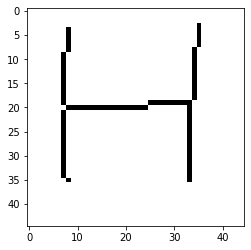

In [192]:
img = cv2.imread("./test2.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.threshold(img, 128, 1, cv2.THRESH_BINARY)[1]
img = cv2.resize(img, (45, 45))
# Convert image shape to have 1 channel (standard image format)
img = img.reshape(45, 45, 1)
img ^= 1
img = morphology.skeletonize(img)
img ^= 1
ts = transforms.ToTensor()
img: torch.Tensor = ts(img)
img = img.unsqueeze(0)

out = model(img)
_, pred = torch.max(out, 1)

print(classes[pred])
plt.imshow(img[0][0], cmap="gray")